# Gensim word vector visualization of various word vectors

# Initial Setup

In [167]:
# Each time you (re-start) SageMaker notebook, you need to install gensim, it's not available as part of conda by default
# Be patient! This may take few mins!

#!conda install -y gensim

In [1]:
import os
import numpy as np

# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# For dimensionality reduction (to plot in 2d or 3d)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Load Word Vectors

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [2]:
# If this is the first time you are running this notebook, uncomment the following lines and run this cell
# Be patient! This may take few mins!

#!wget https://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [3]:
glove_file = datapath(os.path.join(os.getcwd(),'glove.6B.100d.txt'))
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

# Word Similarity

In [4]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [196]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [197]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

# Anology

In [199]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


![Analogy](./imgs/word2vec-king-queen-composition.png)

In [200]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [201]:
analogy('king', 'queen', 'man')

'woman'

In [202]:
analogy('japan', 'japanese', 'australia')

'australian'

In [203]:
analogy('australia', 'beer', 'france')

'champagne'

In [204]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [205]:
analogy('tall', 'tallest', 'long')

'longest'

In [206]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [207]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Visualization

In [326]:
words = ['queen', 'king', 'man', 'woman', 'boy', 'girl','coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china', 'england',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']

In [327]:
word_vectors = np.array([model[w] for w in words])

In [16]:
def two_dim(word_vectors, method='tsne'):
    if method == 'pca':
        return PCA().fit_transform(word_vectors)[:,:2]
    elif method == 'tsne':
        return TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32).fit_transform(word_vectors)[:,:2]
    else:
        raise ValueError('Method %s is not supported. Supported methods are tsne and pca!')

def display_scatterplot(words, word_vectors, method='tsne'):
    
    x_y = two_dim(word_vectors, method)

    plt.figure(figsize=(20,20))
    plt.scatter(x_y[:,0], x_y[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, x_y):
        plt.text(x+0.05, y+0.05, word)

In [6]:
display_scatterplot(words, word_vectors, method='pca')

NameError: name 'words' is not defined

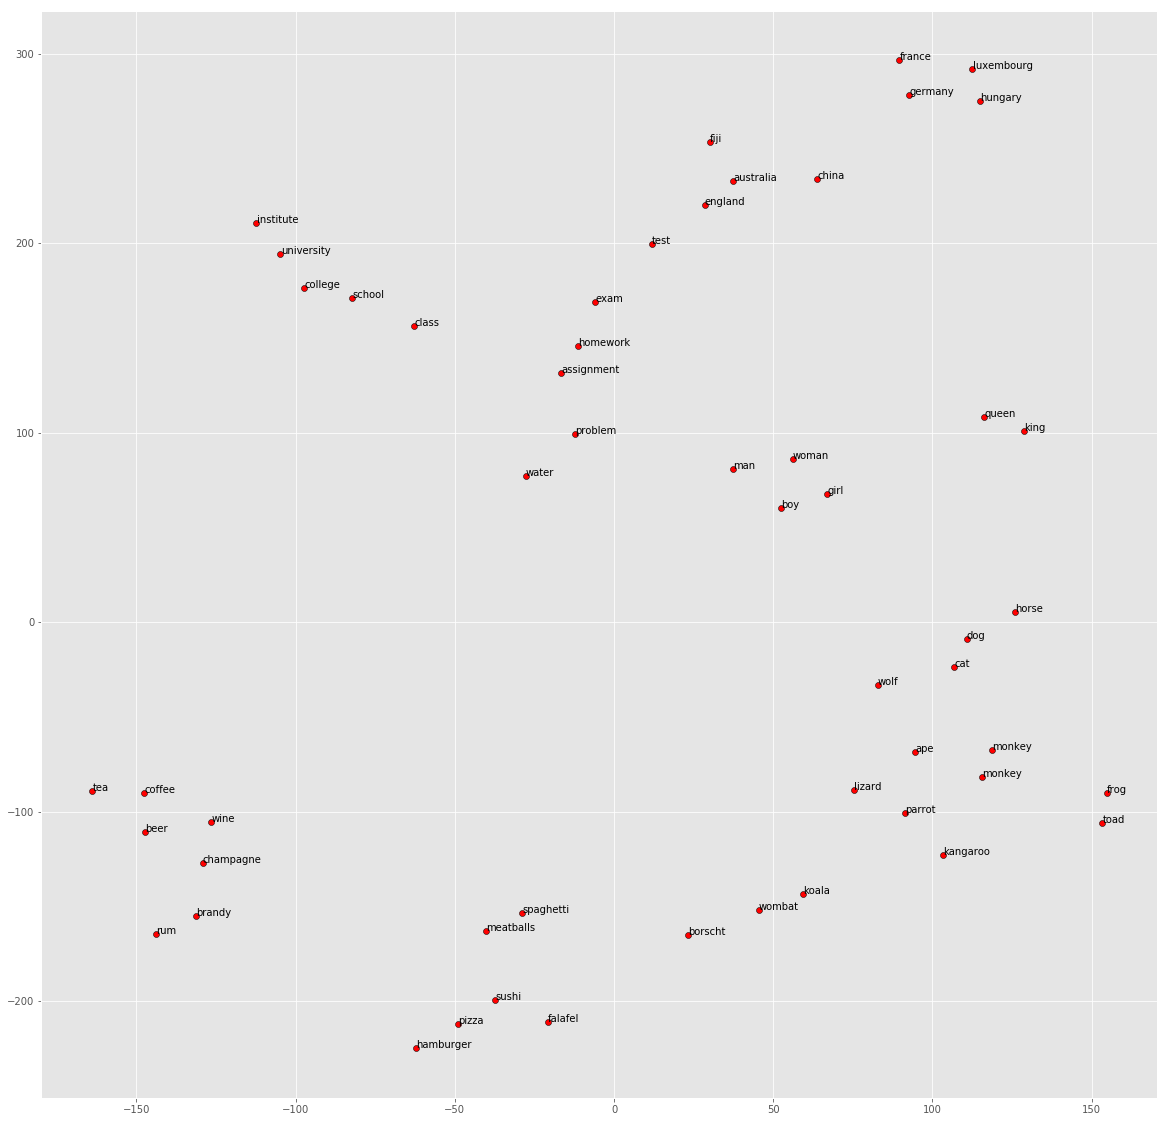

In [254]:
display_scatterplot(words, word_vectors, method='tsne')

# Clustring

In [28]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
from sklearn.cluster import KMeans

output_notebook()


class WordCluster(object):
    def __init__(self, words, word_vectors, cluster_name="C0", cluster_centroid=None):
        
        self.words = words
        self.word_vectors = word_vectors
        self.cluster_name = cluster_name
        self.cluster_centroid = None

        self.sub_clusters = None
        self.kmeans_model = None
    
    def two_dim(self, word_vectors, method='tsne'):
        if method == 'pca':
            return PCA().fit_transform(word_vectors)[:,:2]
        elif method == 'tsne':
            return TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32).fit_transform(word_vectors)[:,:2]
        else:
            raise ValueError('Method %s is not supported. Supported methods are tsne and pca!')

        
    def plot_points(fig, xs, ys, labels, color="blue"):
        df = pd.DataFrame(columns=['x', 'y', 'word'])
        df['x'], df['y'], df['label'] = xs, ys, labels

        source = ColumnDataSource(ColumnDataSource.from_df(df))
        labels = LabelSet(x="x", y="y", text="label", y_offset=8,
                      text_font_size="8pt", text_color=color,
                      angle=0, angle_units='deg',
                      source=source, text_align='center')

        fig.circle("x", "y", size=2, source=source, line_color=color, fill_alpha=0.8)
        fig.add_layout(labels)
    
    def cluster(self, n_clusters=10):
    
        if len(self.word_vectors) > 1000: # too large, sample is good enough
            sample_indexes = np.random.choice(len(self.word_vectors), 1000, replace=False)
            word_vectors = [self.word_vectors[i] for i in sample_indexes]
        else:
            word_vectors = self.word_vectors

        self.kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, random_state=0)
        kmeans = self.kmeans_model
        kmeans.fit_transform(word_vectors) # remove transform?
        
        clusters = kmeans.predict(self.word_vectors)
        
        c_to_word_index = {}
        for i, c in enumerate(clusters):
            if c_to_word_index.get(c) is None:
                c_to_word_index[c] = []
            c_to_word_index[c].append(i)
        
        self.sub_clusters = []
        
        for cluster_id in range(n_clusters):
            words = [self.words[word_index] for word_index in c_to_word_index[cluster_id]]
            word_vectors = [self.word_vectors[word_index] for word_index in c_to_word_index[cluster_id]]
            word_cluster = WordCluster(words, np.array(word_vectors), cluster_name=self.cluster_name + "." + str(cluster_id), cluster_centroid=kmeans.cluster_centers_[cluster_id])
            self.sub_clusters.append(word_cluster)
        
        print(f"Cluster Inertia: {kmeans.inertia_}")

    def plot(self):
        if self.kmeans_model is None:
            x_y = self.two_dim(self.word_vectors)
            x_y_words = x_y
            x_y_centroids = None
        else:
            clusters = self.kmeans_model.cluster_centers_
            n_clusters = len(clusters)
            x_y = self.two_dim(np.concatenate((self.word_vectors, clusters)))
            x_y_words = x_y[0:-1*n_clusters]
            x_y_centroids = x_y[-1*n_clusters:]
        
        fig = figure(plot_width=1800, plot_height=1800)

        plot_points(fig, x_y_words[:,0], x_y_words[:,1], self.words)

        if self.kmeans_model is not None:
            plot_points(fig, x_y_centroids[:,0], x_y_centroids[:,1], ["%s%s" % (self.cluster_name, i) for i in range(len(clusters))], color="red")

        show(fig, notebook_handle=True)

Loading BokehJS ...

In [22]:
# Download the public sample topic detection file (it's already included in github repository, this is just in case)
#! aws s3 cp --recursive s3://public-sample-us-west-2/TopicModeling/ ./


In [23]:
def embed(word):
    try:
        return model[word]
    except:
        return None

with open('Sample.txt', 'r') as file:
    data = file.read().replace('\n', ' ')

all_words = set(data.lower().split())
all_word_vectors = [embed(w) for w in all_words]
out_of_vocab_words = [w for i, w in enumerate(all_words) if all_word_vectors[i] is None]
in_vocab_words = [w for i, w in enumerate(all_words) if all_word_vectors[i] is not None]
in_vocab_word_vectors = [word_vector for word_vector in all_word_vectors if word_vector is not None]
print(f"all_words: {len(all_words)}, out_of_vocab_words: {len(out_of_vocab_words)}, in_vocab_words: {len(in_vocab_words)}")

all_words: 22349, out_of_vocab_words: 10835, in_vocab_words: 11514


In [24]:
wc = WordCluster(in_vocab_words, np.array(in_vocab_word_vectors))

In [25]:
wc.cluster()

Cluster Inertia: 20698.25253312075


In [ ]:
wc.plot()

In [ ]:
for c in wc.sub_clusters:
    c.cluster()
    c.plot()

In [ ]:
for c in wc.sub_clusters[1].sub_clusters:
    c.cluster()
    c.plot()